# Sparse CCA


##### Mathematical Formulation
This file is provided to run some examples of the Sparse CCA: 

\begin{equation}
\begin{aligned}
\max_{w_1,w_2,z_1,z_2} \quad & w_1^tX_1^tX_2w_2\\
\textrm{s.t.} \quad & w_i^tX_i^tX_iw_i=1,\quad i=1,2,\\
& -C_iz_i\leq w_i\leq C_iz_i,\quad i=1,2,\\
& \|z_i\|_1\leq k_i,\quad i=1,2,\\
  &w_i\in\mathbb R^{p_i}, z_i\in\{0,1\}^{p_i},\quad i=1,2.\\
\end{aligned}
\end{equation}

The most methods that solve this problem requires gurobipy. This is a package from Gurobi, a commercial solver that is able to deal with problems with bilinear terms. All methods study in Amorosi et al. (2023) are implemented in the file called _CCA.py_. 

##### Input

The input of these methods is:
- $X_i \in \mathbb{R}^{n\times p_i}$: $i$-th dataset matrix, $i=1,2$.
- $k_i \in \mathbb{N}$: maximum number of non-zero components in the Canonical Vector $w_i$, $i=1,2$.
- $bigM\_estimation$: True if bigM tightening is considered.
- $time\_limit$: maximum time setting by the user.

##### Output

The output of these methods is:
- $objective$: correlation value.
- $w_i$: Canonical Vector whose components are the coefficients/weights associated with the attributes in $X_i$, $i=1,2$.
- $elapsed\_time$: time spent by the method to obtain the solution.

##### CCA.py module
The module _CCA.py_ contains the following methods that are briefly described:

  - _continuous_CCA_: standard Canonical Correlation Analysis implemented in module sklearn.
  - _greedy_CCA_: greedy algorithm that solves the Sparse CCA, implemented in Wiesel et al. (2008), that make use of the continuous version of the problem.
  - _fixing\_wi_: method that solve the Sparse CCA when $w_i$ is fixed, $i=1,2$.
  - _CCA_: principal function that solve exactly the Sparse CCA using Gurobi. It also allows the user to use the best-response approach to get an approximate solution.
  - _multistart\_CCA_: method that calls CCA for solving multiple times the problem using different initial solutions.
  - _benders\_CCA_: method that solve approximately the Sparse CCA using a benders-cut approach. It calls _subproblem_ to obtain the cuts that approximate the solution.
  - _kernelsearch\_CCA_ and _combined\_CCA_: kernel search approaches to obtain an approximate solution for the Sparse CCA. They call _restricted\_CCA_ that is a modified version of the _CCA_ in which only a subset of variables is considered.
  - _pareto\_frontier_: function that allows the user to design a pareto frontier, using a method described before, by changing the maximum number of non-zero components in the Canonical Vector.
  - _initializing_: function that loads different datasets used in the experiments of Amorosi et al. (2023).

##### Example
The following example illustrates how to generate a heatmap of the pareto frontier for the red wine quality training dataset, using the combined best response and kernel search approach.

Import _pareto\_frontier_ and _initializing_ methods from _CCA.py_ module.

In [10]:
from CCA import pareto_frontier, initializing

Setting the dataset used to create the pareto frontier. The _initializing_ method has two parameters. Parameter _mode_ selects the dataset and parameter _scaling_ considered the standarisation of its columns.

- _mode_ = 0: Geographical Original of Music
- _mode_ = 1: Wine Quality (red wine)
- _mode_ = 2: Wine Quality (white wine)
- _mode_ = 3: Student Performance (Portuguese language)
- _mode_ = 4: Student Performance (mathematics)
- _mode_ = 5: YearPredictionMSD (it is required to download this dataset)
- _mode_ = 6: breastdata (rna \& dna: V1–V10)
- _mode_ = 7: breastdata (rna \& dna: V11–V20)
- _mode_ = 8: breastdata (rna \& dna: V1–V20)
- _mode_ = 9: breastdata (rna \& dna: V21–V40)

In our case, we select the _mode_=1 (Red Wine Quality dataset) with _scaling_=True.

In [11]:
dataset1, dataset2, ks = initializing(mode=1, scaling=True)

Run the pareto frontier experiment using the method _pareto\_frontier_. This method provides two files called _paretowine\_train.csv_ and _paretowine\_test.csv_ that includes the mean objective value obtained by the combined best response and kernel search approach, using cross-validation with five splits 70:30.

In [13]:
pareto_frontier(dataset1, dataset2, k1_min=1, k1_max=6, k2_min=1, k2_max=5, name_train="paretowine_train", name_test="paretowine_test")

Time Elapsed: 0.009593725204467773
Objective Value: 0.932035658701802
Initial Kernel_1: [0, 3, 4, 5, 1, 2]
Buckets_1: []
Initial Kernel_2: [1, 2, 0, 4, 3]
Buckets_2: []
[0, 3, 4, 5, 1, 2]
[1, 2, 0, 4, 3]
      fixed.acidity  volatile.acidity  citric.acid  residual.sugar  chlorides  \
460        0.505637         -0.546301     1.278352       -0.169374  -0.094901   
1046      -0.413324          1.408354    -1.391037       -0.594928  -0.243630   
585       -0.413324         -0.099523    -0.159011       -0.098449   0.075076   
1181       0.850247         -0.769690     0.816342       -0.630391  -0.413607   
1145      -0.068714         -1.830789     0.816342       -0.027523  -0.243630   
...             ...               ...          ...             ...        ...   
763        0.563072          0.710263    -0.056343       -0.382151   0.181311   
835       -0.413324          0.766110    -0.877693       -0.736779  -0.456101   
1216      -0.241019          0.235561     0.200329       -0.382151 

GurobiError: License expired 2023-03-16

Represent the heatmap using _seaborn_ module.

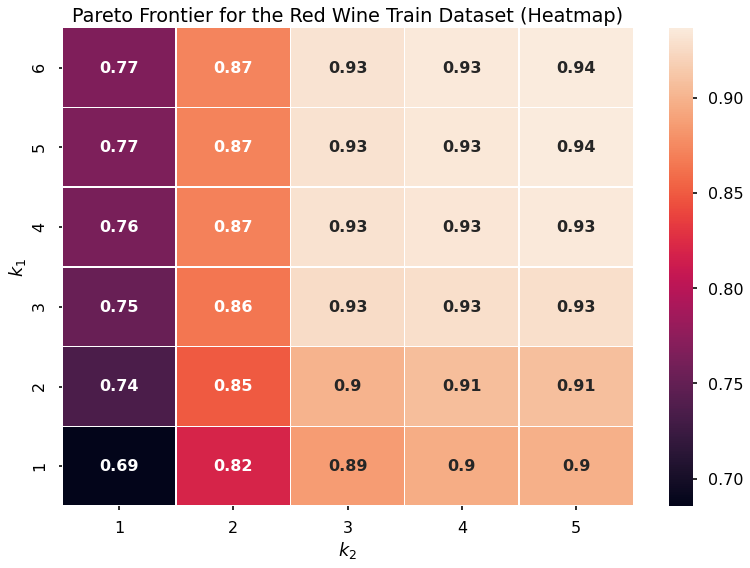

In [14]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')

x = np.arange(0, 6)
y = np.arange(0, 5)

X, Y  = np.meshgrid(x, y)

Z = np.genfromtxt('paretowine_train.csv', delimiter=',')

Z = Z[0:6, 0:5]

ax = sns.heatmap(Z[::-1, :], xticklabels=[1, 2, 3, 4, 5], yticklabels=[6, 5, 4, 3, 2, 1], annot=True, annot_kws={"size": 16, "weight":"bold"}, linewidths=0.5)
ax.set(xlabel="$k_2$", ylabel="$k_1$")
ax.set_title('Pareto Frontier for the Red Wine Train Dataset (Heatmap)')

plt.show()